In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from openpyxl import load_workbook

In [2]:
# This function outputs the Net Sentiment Rate (NSR) of the single line. 
def oneline_vader(line) :
    
    tb = TextBlob(line)

    # Calculate NSR
    nsr = tb.sentiment.polarity
    
    return nsr

In [3]:
# Open spreadsheet with survey results
spreadsheet = load_workbook(filename="SurveyAnswers.xlsx", data_only=True)
sheet = spreadsheet['Sentiment Results']

survey = []
# put each result in a list/tuple
for i in range(2, 102):
    survey.append(sheet["E" + str(i)].value)

In [4]:
# Have TextBlob evaluate each line and add result to a list/tuple
file1 = open("lines.txt", 'r')

textblob = []

for line in file1:
    nsr = oneline_vader(line)
    textblob.append(nsr)

file1.close()

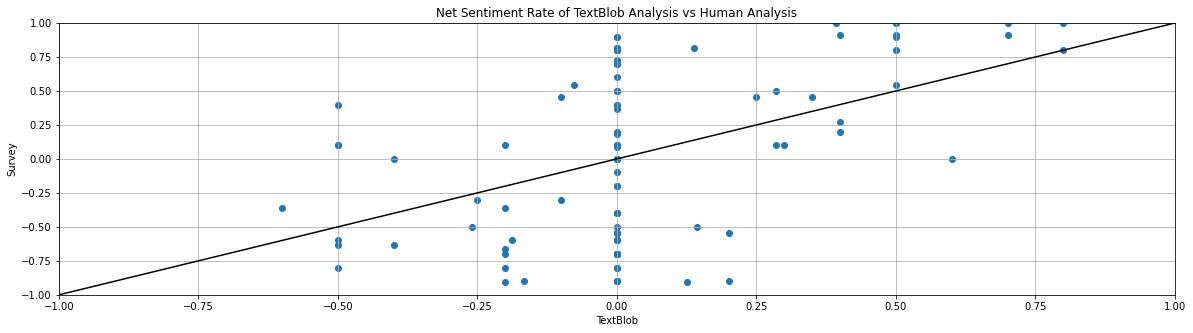

In [7]:
plt.scatter(textblob, survey)
plt.plot([-1,1], [-1, 1], color='black')
plt.title('Net Sentiment Rate of TextBlob Analysis vs Human Analysis')
plt.xlabel('TextBlob')
plt.ylabel('Survey')
plt.grid(True)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.rcParams["figure.figsize"] = (20,5)
plt.show()

In [6]:
c = 0

for i in range(0, 100):
    if textblob[i] == survey[i]:
        c += 1

print("Objective Accuracy of TextBlob is " + str(c/100))

Objective Accuracy of TextBlob is 0.05
